In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)

from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
from numpy import arange

import pandas as pd
import sklearn.ensemble
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
base = pd.read_csv('../Data/BaseData.csv')

In [3]:
base.shape

(2580, 299)

In [4]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
svr = SVR()

In [7]:
parameters={'cache_size': range(100,140,10),'epsilon': arange(0.1,1.1,0.1),
            'degree':range(1,3,1),
            'kernel':['linear','poly']}
svr_grid = GridSearchCV(svr,parameters,cv=3, n_jobs=-1, verbose=2)
svr_grid.fit(X, y)
#grid_parm=svr_random.best_params_print(svr_predict_Test)
#print(svr_random.best_parmas_)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'cache_size': range(100, 140, 10),
                         'degree': range(1, 3),
                         'epsilon': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'kernel': ['linear', 'poly']},
             verbose=2)

In [8]:
svr_grid.best_params_

{'cache_size': 100, 'degree': 1, 'epsilon': 0.1, 'kernel': 'linear'}

In [9]:
svr_best_params = svr_grid.best_params_

In [10]:
svr_best_model = SVR(**svr_best_params)

In [11]:
svr_best_model.fit(X,y)

SVR(cache_size=100, degree=1, kernel='linear')

In [12]:
svr_best_model.score(X,y)

0.4306504314100671

In [13]:
predicted_value = svr_best_model.predict(X)

In [14]:
true_value = y

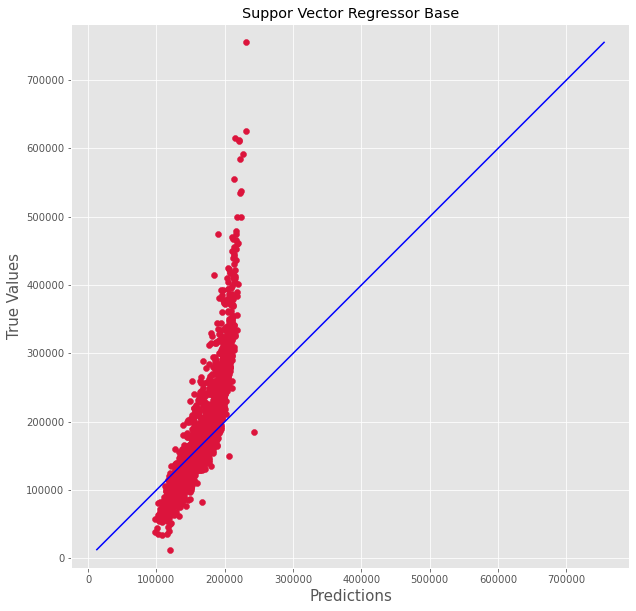

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(predicted_value, true_value, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

plt.title('Suppor Vector Regressor Base')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('True Values', fontsize=15)
plt.axis('equal')
plt.show()